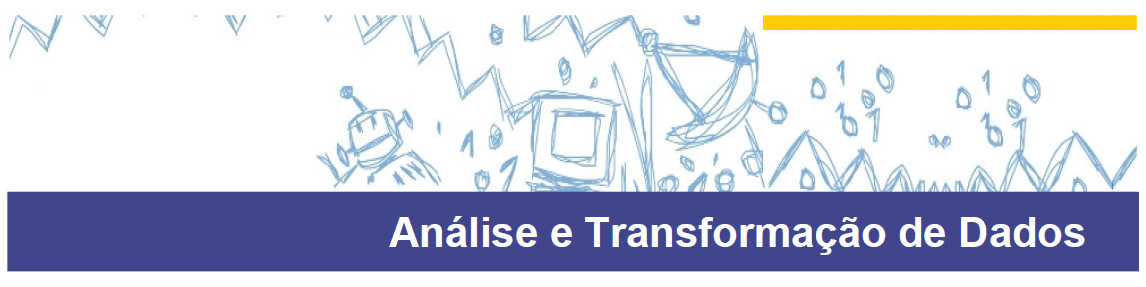
### Ficha Prática nº 7 de ATD 2022
Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se continuar a ilustrar os conceitos de frequência e efetuar a análise de sinais periódicos, de tempo contínuo e de tempo discreto, pela Série de Fourier trigonométrica e complexa. Pretende-se também aplicar o Teorema da Amostragem para determinar a frequência de amostragem a usar na obtenção da representação em tempo discreto de um sinal e usar a Transformada de Fourier Discreta (DFT) para ilustrar os conceitos de frequência em sinais de tempo discreto.

**Exercício 1.** Considerar uma sequência de dados $x[n]$ que resultou da amostragem de um determinado sinal de tempo contínuo $x(t)$ com um período de amostragem $Ts = 4ms$ (datasetfp7.dat disponível no Nónio).

**Exercício 1.1**  Assumindo que o sinal é periódico, utilizar o script, com eventuais adaptações, da ficha 6 para:

In [ ]:
%%file SerieFourier.m

function [Cm,tetam]=SerieFourier(t,x,T0,m_max)
                              % t e x devem ser vetores coluna
   A=zeros(length(t),2*m_max+2);
   for k=0:m_max
      A(:,k+1)=cos(2*pi/T0*t*k);
      A(:,m_max+1+k+1)=-sin(2*pi/T0*t*k);
   end
   coef=pinv(A)*x;
   a=coef(1:m_max+1);
   b=coef(m_max+2:2*m_max+2);
   [nl,nc]=size(a);
   for lin=1:nl,
       for col=1:nc,
           if abs(a(lin,col))<0.001 & abs(b(lin,col))<0.001,
               a(lin,col)=0; b(lin,col)=0;
           end
       end
   end
   Cm=abs(a+b*j);       % <=> Cm=(a.^2+b.^2).^0.5
   tetam=angle(a+b*j);  % <=> tetam=atan(b./a)
end

**Exercício 1.1.1.**	Determinar e representar graficamente os valores dos coeficientes ($Cm$ e $\theta m$) da Série de Fourier trigonométrica do sinal $x[n]$ com um valor adequado de $m\_max$ (sugestão: $m\_max = 80$) da Série de Fourier.

FP7 - Exercício 1.1.1



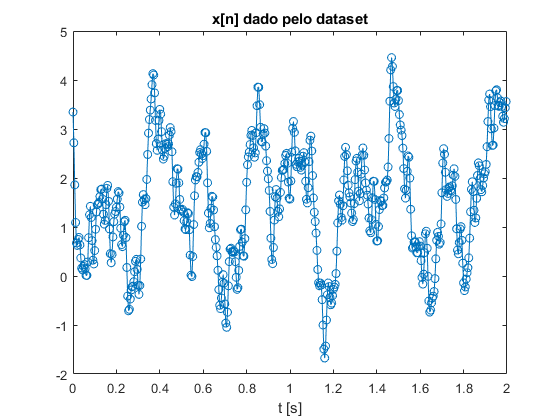

In [2]:
disp('FP7 - Exercício 1.1.1');

x=load('datasetfp7.dat'); % dataset com o sinal
Ts=4*10^-3; % Ts = 4ms
ws=2*pi/Ts;
N=length(x); % período de x[n]
Omega0=2*pi/N;
T0=N*Ts; % período de x(t)
w0=2*pi/T0;

n=(0:N-1)';
t=n*Ts;

figure(1);
plot(t,x,'-o');
title('x[n] dado pelo dataset');
xlabel('t [s]');

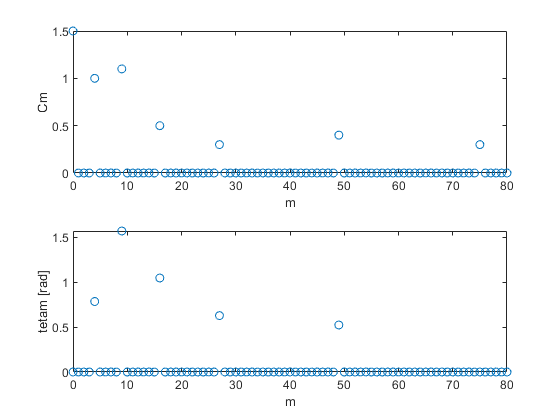

In [3]:
m_max=80;
[Cm,tetam]=SerieFourier(t,x,T0,m_max);

m=0:m_max;
figure(2);
subplot(211);
plot(m,Cm,'o');
ylabel('Cm');
xlabel('m')
subplot(212);
plot(m,tetam,'o');
ylabel('tetam [rad]')
xlabel('m')

**1.1.2.**	Obter e representar graficamente a sobreposição do sinal original e dos sinais aproximados a partir dos coeficientes da Série de Fourier trigonométrica para vários valores de $m\_max$.

FP7 - Exercício 1.1.2



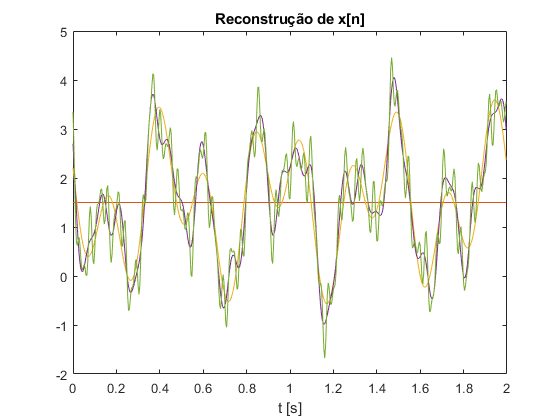

In [4]:
disp('FP7 - Exercício 1.1.2');

mt=[0 10 40 80];

figure(3);
plot(t,x);
title('Reconstrução de x[n]');
xlabel('t [s]');
hold on

for k=1:length(mt)
    xa=zeros(size(t));
    for m=0:mt(k)
        xa=xa+Cm(m+1)*cos(m*2*pi/T0*t+tetam(m+1));
    end
    plot(t,xa);
end
hold off

**1.1.3.**	Obter e representar graficamente a amplitude e a fase dos valores do coeficiente $cm$ da Série de Fourier complexa do sinal $x[n]$, a partir dos coeficientes ($Cm$ e $\theta m$).

FP7 - Exercício 1.1.3



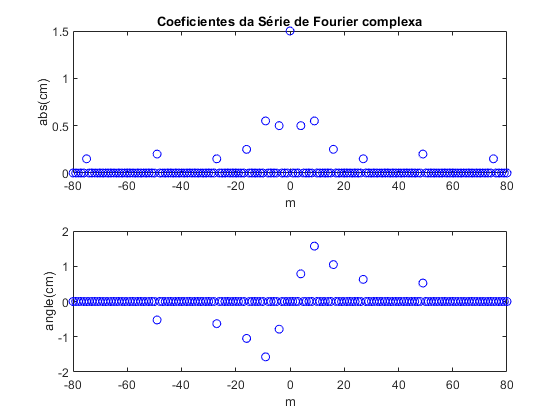

In [5]:
disp('FP7 - Exercício 1.1.3');
cmneg=Cm(end:-1:2)/2.*exp(-j*tetam(end:-1:2));
c0=Cm(1)*cos(tetam(1));
cmpos=Cm(2:end)/2.*exp(j*tetam(2:end));
cm=[cmneg; c0; cmpos];

m=-m_max:m_max;
figure(4);
subplot(211);
plot(m,abs(cm),'bo');
title('Coeficientes da Série de Fourier complexa')
ylabel('abs(cm)')
xlabel('m')
subplot(212);
plot(m,unwrap(angle(cm)),'bo');
ylabel('angle(cm)')
xlabel('m')

**1.1.4.**	Determinar e representar graficamente a Transformada de Fourier Discreta (DFT) do sinal $x[n]$, usando as funções do Matlab *fft* e *fftshift*, em módulo e em fase, em função da frequência angular $\omega$ (em $rad/s$) e em função da frequência angular $\Omega$ (em $rad$). Comparar os resultados obtidos com os valores do coeficiente $cm$ da Série de Fourier complexa do sinal $x[n]$.

FP7 - Exercício 1.1.4



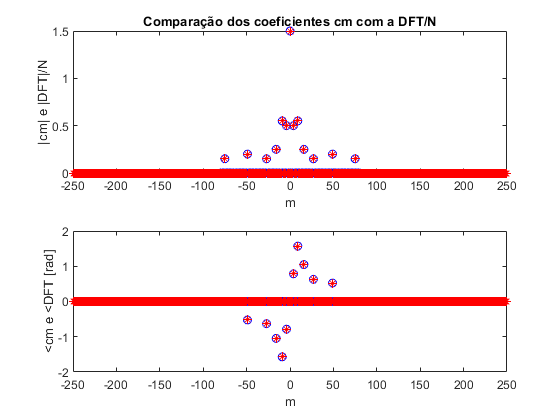

In [6]:
disp('FP7 - Exercício 1.1.4');

X=fftshift(fft(x)); % DFT de x[n]
X(abs(X)<0.001)=0; % anular valores residuais

if(mod(N,2)==0)   % definição de w e Omega
    w=-ws/2:ws/N:ws/2-ws/N;
    Omega=-pi:2*pi/N:pi-2*pi/N;
else
    w=-ws/2+ws/N/2:ws/N:ws/2-ws/N/2;
    Omega=-pi+pi/N:2*pi/N:pi-pi/N;
end
figure(5);
subplot(211);
plot(m,abs(cm),'bo',w/w0,abs(X)/N,'r*');
title('Comparação dos coeficientes cm com a DFT/N')
ylabel('|cm| e |DFT|/N')
xlabel('m')
subplot(212);
plot(m,unwrap(angle(cm)),'bo',w/w0,unwrap(angle(X)),'r*');
ylabel('<cm e <DFT [rad]')
xlabel('m')

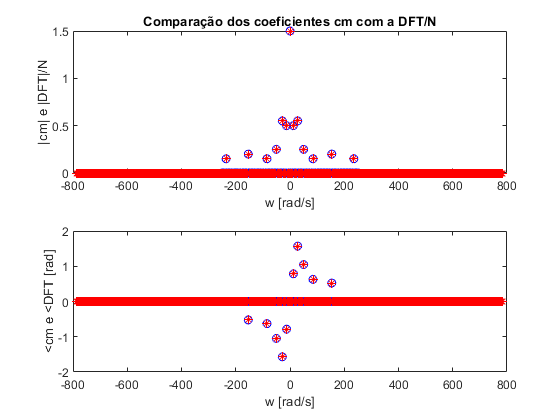

In [7]:
figure(6);
subplot(211);
plot(m*w0,abs(cm),'bo',w,abs(X)/N,'r*');
title('Comparação dos coeficientes cm com a DFT/N')
ylabel('|cm| e |DFT|/N')
xlabel('w [rad/s]')
subplot(212);
plot(m*w0,unwrap(angle(cm)),'bo',w,unwrap(angle(X)),'r*');
ylabel('<cm e <DFT [rad]')
xlabel('w [rad/s]')

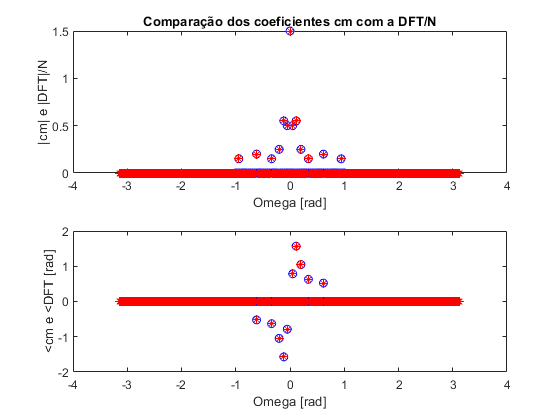

In [8]:
figure(7);
subplot(211);
plot(m*Omega0,abs(cm),'bo',Omega,abs(X)/N,'r*');
title('Comparação dos coeficientes cm com a DFT/N')
ylabel('|cm| e |DFT|/N')
xlabel('Omega [rad]')
subplot(212);
plot(m*Omega0,unwrap(angle(cm)),'bo',Omega,unwrap(angle(X)),'r*');
ylabel('<cm e <DFT [rad]')
xlabel('Omega [rad]')

**Exercício 1.2.** A partir da análise efetuada, identificar as componentes de frequência do sinal de tempo discreto $x[n]$ e do sinal de tempo contínuo $x(t)$.

In [9]:
disp('FP7 - Exercício 1.2');

m=0:m_max;
ind=find(Cm>0.1);
disp('Componentes de frequência do sinal x[n], m:');
disp(m(ind))
disp('Frequências do sinal x[n], Omega [rad]:');
omega_xn=m(ind)*2*pi/N;
disp(omega_xn)
disp('Frequências do sinal x(t), w [rad/s]:');
w_xt=m(ind)*2*pi/T0; %w_xt=omega_xn/Ts;
disp(w_xt)
disp('Frequências do sinal x(t), f [Hz]');
disp(w_xt/2/pi)

FP7 - Exercício 1.2
Componentes de frequência do sinal x[n], m:
     0     4     9    16    27    49    75

Frequências do sinal x[n], Omega [rad]:
         0    0.0503    0.1131    0.2011    0.3393    0.6158    0.9425

Frequências do sinal x(t), w [rad/s]:
         0   12.5664   28.2743   50.2655   84.8230  153.9380  235.6194

Frequências do sinal x(t), f [Hz]
         0    2.0000    4.5000    8.0000   13.5000   24.5000   37.5000




**Exercício 2** Considerar o sinal periódico de tempo contínuo $x(t)=-1+3sin(50\pi t)+4cos(20\pi t+\pi/4)sin(40\pi t)$.

**Exercício 2.1** Aplicando o Teorema da Amostragem, escolher uma frequência de amostragem $f_s$ adequada, e que seja múltipla da frequência fundamental $f_0$. Obter a expressão de $x[n]$.

In [10]:
% Ex 2.1
disp('FP7 - Exercício 2.1');

w0=10*pi;
f0=w0/(2*pi)

% Aplicando o Teorema da Amostragem, sabendo que fmax = 30 Hz
fs=65
ws=2*pi*fs;
Ts=1/fs;

syms t n
xtt=-1+3*sin(50*pi*t)+4*cos(20*pi*t+pi/4)*sin(40*pi*t)
xnn=subs(xtt,t,n*Ts)

% Expressão de x(t) de acordo com a formulação da Série de Fourier trigonométrica
% x(t) = 1 cos(pi) + 2 cos(20pi t - 3pi/4) + 3 cos(50pi t - pi/2) + 2 cos(60pi t - pi/4)
xtt1 = 1*cos(pi) + 2*cos(20*pi*t - 3*pi/4) + 3*cos(50*pi*t - pi/2) + 2*cos(60*pi*t - pi/4)

FP7 - Exercício 2.1

f0 =

     5


fs =

    65

 
xtt =
 
3*sin(50*pi*t) + 4*cos(pi/4 + 20*pi*t)*sin(40*pi*t) - 1
 
 
xnn =
 
3*sin((10*pi*n)/13) + 4*cos(pi/4 + (4*pi*n)/13)*sin((8*pi*n)/13) - 1
 
 
xtt1 =
 
2*cos((3*pi)/4 - 20*pi*t) + 3*cos(pi/2 - 50*pi*t) + 2*cos(pi/4 - 60*pi*t) - 1
 



**Exercício 2.2** Indicar as frequências angulares ($\omega$ e $\Omega$), as frequências fundamentais ($\omega_0$ e $\Omega_0$) e os períodos fundamentais ($T_0$ e $N$) dos sinais de tempo contínuo $x(t)$ e de tempo discreto $x[n]$.

In [11]:
% Ex 2.2
disp('FP7 - Exercício 2.2');
w0
Omega0=Ts*w0
T0=2*pi/w0
f0=1/T0;
N=T0/Ts

if(mod(N,2)==0)
    w=-ws/2:ws/N:ws/2-ws/N;
    Omega=-pi:2*pi/N:pi-2*pi/N;
else
    w=-ws/2+ws/N/2:ws/N:ws/2-ws/N/2;
    Omega=-pi+pi/N:2*pi/N:pi-pi/N;
end

FP7 - Exercício 2.2

w0 =

   31.4159


Omega0 =

    0.4833


T0 =

    0.2000


N =

    13




**Exercício 2.3** Representar graficamente a sobreposição do sinal de tempo contínuo (com um passo temporal reduzido e traço contínuo) e o correspondente sinal amostrado (ponto a ponto).

FP7 - Exercício 2.3



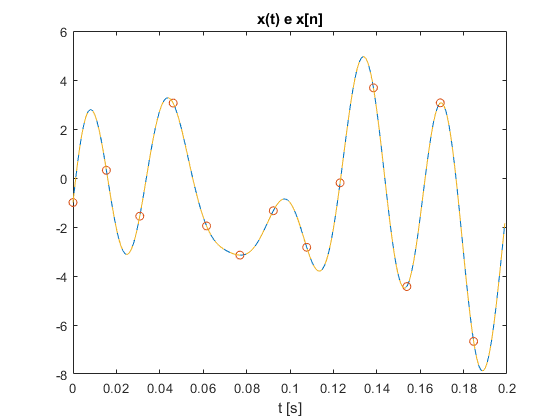

In [12]:
% Ex 2.3
disp('FP7 - Exercício 2.3');
t=0:0.001:T0-0.001;
xt=double(subs(xtt));
xt1=double(subs(xtt1));

n=0:N-1;
xn=double(subs(xnn));

figure(1)
plot(t,xt,n*Ts,xn,'o',t,xt1,'--');
title('x(t) e x[n]')
xlabel('t [s]');

**Exercício 2.4** Determinar e representar graficamente a Transformada de Fourier Discreta (DFT) do sinal $x[n]$, usando as funções do Matlab *fft* e *fftshift*, em módulo e em fase, em função da frequência angular $\omega$ (em rad/s) e em função da frequência angular $\Omega$ (em rad).

FP7 - Exercício 2.4



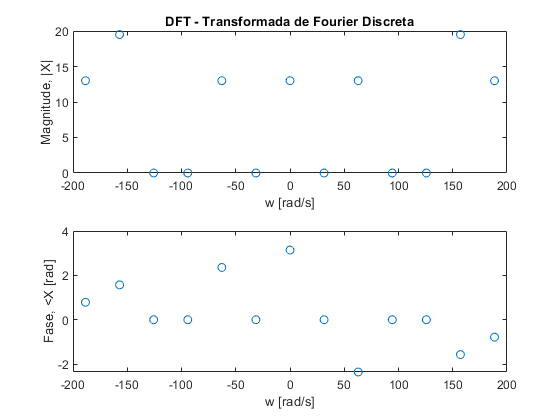

In [13]:
% Ex 2.4
disp('FP7 - Exercício 2.4');
X=fftshift(fft(xn)); % DFT de x[n]
X(abs(X)<0.001)=0; % anular valores residuais
abs_X=abs(X);
ang_X=angle(X);

figure(2);
subplot(211)
plot(w,abs_X,'o');
title('DFT - Transformada de Fourier Discreta');
ylabel('Magnitude, |X|')
xlabel('w [rad/s]')
subplot(212)
plot(w,unwrap(ang_X),'o');
ylabel('Fase, <X [rad]');
xlabel('w [rad/s]');

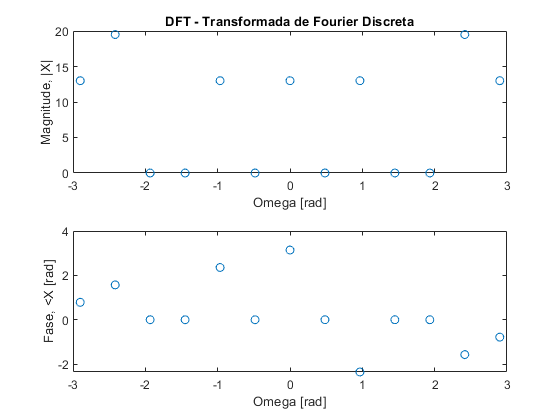

In [14]:
figure(3);
subplot(211)
plot(Omega,abs_X,'o');
title('DFT - Transformada de Fourier Discreta');
ylabel('Magnitude, |X|')
xlabel('Omega [rad]')
subplot(212)
plot(Omega,unwrap(ang_X),'o');
ylabel('Fase, <X [rad]')
xlabel('Omega [rad]')

**Exercício 2.5** Determinar e representar graficamente os coeficientes da Série de Fourier complexa do sinal, $cm$, a partir da DFT.

FP7 - Exercício 2.5



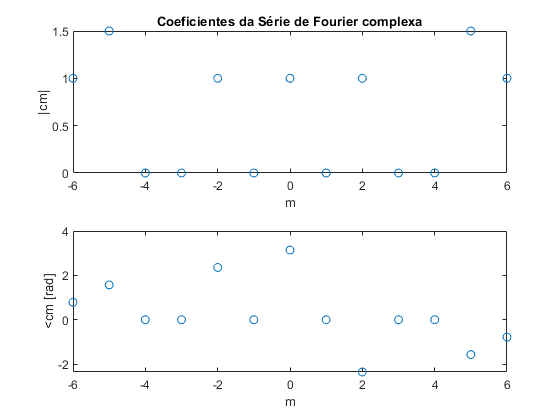

In [15]:
% Ex 2.5
disp('FP7 - Exercício 2.5');
cm= X/N;

figure(4);
subplot(211)
plot(Omega/Omega0,abs(cm),'o');
title('Coeficientes da Série de Fourier complexa');
ylabel('|cm|')
xlabel('m')
subplot(212)
plot(Omega/Omega0,unwrap(angle(cm)),'o');
ylabel('<cm [rad]')
xlabel('m')

**Exercício 2.6** Determinar e representar graficamente os parâmetros da Série de Fourier trigonométrica ($Cm$ e $\theta m$) do sinal.

FP7 - Exercício 2.6



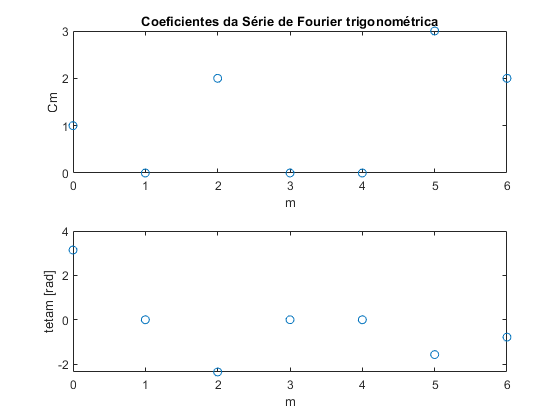

In [16]:
% Ex 2.6
disp('FP7 - Exercício 2.6');
ind=find(Omega>=0);
Cm=[abs(cm(ind(1))) 2*abs(cm(ind(2:end)))];
tetam=angle(cm(ind));

figure(5);
subplot(211)
plot(Omega(ind)/Omega0,Cm,'o');
title('Coeficientes da Série de Fourier trigonométrica');
ylabel('Cm')
xlabel('m')
subplot(212)
plot(Omega(ind)/Omega0,tetam,'o');
ylabel('tetam [rad]')
xlabel('m')

**Exercício 2.7** Reconstruir o sinal $x(t)$ a partir dos parâmetros da Série de Fourier trigonométrica, obtidos em 2.6. Comparar graficamente com o sinal original.

FP7 - Exercício 2.7



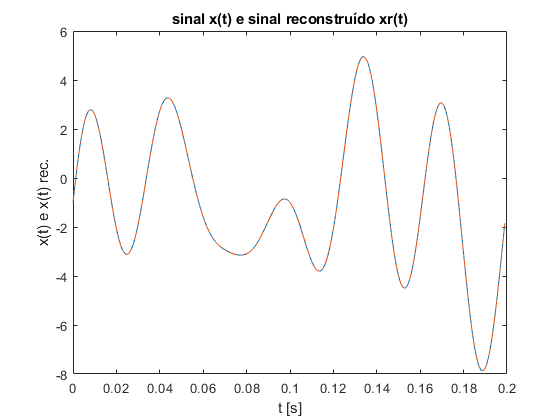

In [17]:
% Ex 2.7
disp('FP7 - Exercício 2.7');
xtr=zeros(size(t));
m_max=Omega(ind(end))/Omega0;
for m=0:m_max
    xtr=xtr+Cm(m+1)*cos(m*w0*t+tetam(m+1));
end

figure(6)
plot(t,xt,t,xtr,'-.');
title('sinal x(t) e sinal reconstruído xr(t)');
xlabel('t [s]')
ylabel('x(t) e x(t) rec.')